<a href="https://colab.research.google.com/github/nikhilbansal23/CustomerChurnPrediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import uuid
from datetime import datetime
from scipy.stats import norm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
cust = pd.read_csv('/content/drive/MyDrive/Datasets/Customer Churn Prediction/Data_Science_Challenge.csv')

In [113]:
cust = cust.rename(columns=lambda x: x.replace(' ', '_'))

In [114]:
cust.head(1)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [115]:
print("Customer data count "+str(len(cust)))

Customer data count 3333


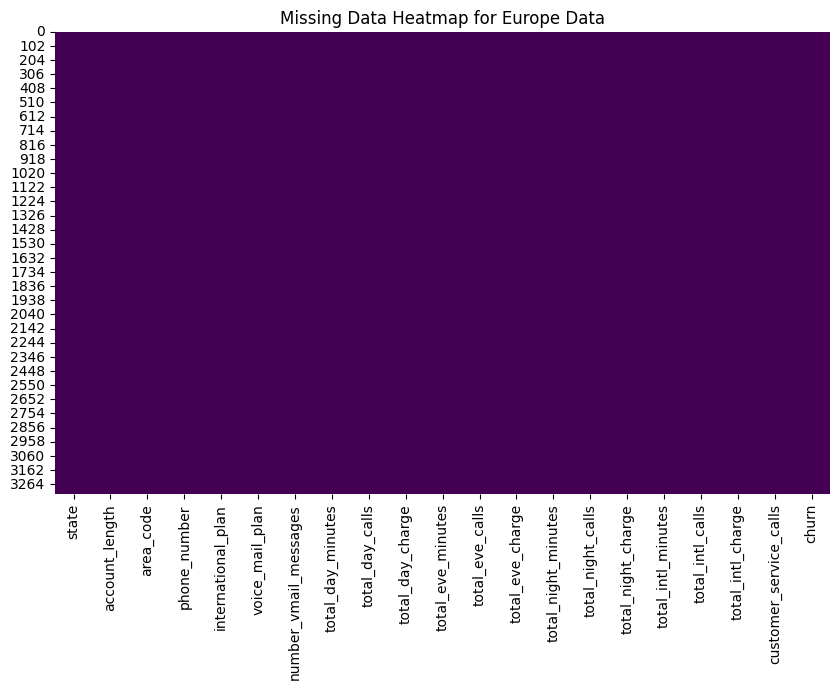

In [116]:
missing_data = cust.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(cust.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for Europe Data')
plt.show()

In [117]:
cust.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [118]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [119]:
cust['state'].count()

3333

## **Boxplot for Outlier Detection**

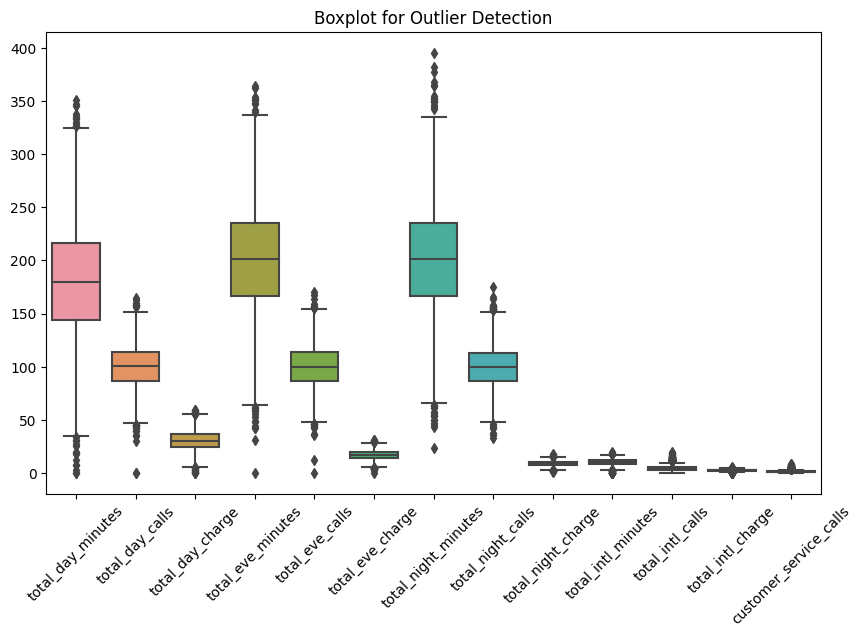

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset (replace 'data' with your dataset variable)
# Create boxplots for each numerical column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=cust[['total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


## **Frequency for Churn**

In [121]:
churn =  cust.groupby('churn')['phone_number'].count().reset_index()

churn.columns = ['Churn', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(churn, x='Churn', y='Count', title='Frequency for Churn')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title='Frequency for Churn', yaxis_title='Frequency')
fig.show()

# **Distribution of Churn Across States (Bar Chart)**

In [122]:
# Calculate churn count per state
churn_count = cust.groupby('state')['churn'].sum().reset_index()

# Create a bar chart for Churn across States
fig = px.bar(churn_count, x='state', y='churn', title='Churn Count Across States')
fig.show()

## **Top 5 States by Frequency**

In [123]:
# Calculate value counts for each state
state_counts = cust.groupby('state')['phone_number'].count().reset_index()
state_counts.columns = ['state', 'Count']

# Select the top 5 states based on value counts
top_5 = state_counts.head(5)

# Create a bar chart using Plotly Express
fig = px.bar(top_5, x='state', y='Count', title='Top 5 States by Frequency')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title='State', yaxis_title='Frequency')
fig.show()

## **Frequency for International Plans**

In [124]:
international_plan =  cust.groupby('international_plan')['phone_number'].count().reset_index()

international_plan.columns = ['International Plan', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(international_plan, x='International Plan', y='Count', title='Frequency for International Plans')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title='Frequency for International Plans', yaxis_title='Frequency')
fig.show()

## **Frequency for Voicemail Plans**

In [125]:
voice_mail_plan =  cust.groupby('voice_mail_plan')['phone_number'].count().reset_index()

international_plan.columns = ['Voicemail Plan', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(international_plan, x='Voicemail Plan', y='Count', title='Frequency for Voicemail Plans')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis_title='Frequency for Voicemail Plans', yaxis_title='Frequency')
fig.show()

## **Phone Number Count and Voicemail Messages by Top States**

In [126]:
# Count the unique phone numbers per state
phone_count = cust.groupby('state')['phone_number'].nunique().reset_index()
phone_count.columns = ['state', 'phone_number']

# Calculate the total voicemail messages per state
voicemail_count = cust.groupby('state')['number_vmail_messages'].sum().reset_index()

# Merge the phone count and voicemail count by state
merged_data = pd.merge(phone_count, voicemail_count, on='state', how='left')

# Sort by Phone Number Count to get top states
top_states = merged_data.sort_values('phone_number', ascending=False).head(5)

# Create a stacked bar chart for top states showing Phone Number Count and Number of Voicemail Messages
fig = px.bar(top_states, x='state', y=['phone_number', 'number_vmail_messages'],
             title='Phone Number Count and Voicemail Messages by Top States',
             labels={'value': 'Count'}, barmode='stack')
fig.show()

## **Churn Rate by International Plan (Pie Chart)**

In [127]:
churn_international = cust.groupby('international_plan')['churn'].mean().reset_index()

# Create a pie chart for Churn Rate by International Plan
fig = px.pie(churn_international, values='churn', names='international_plan', title='Churn Rate by International Plan')
fig.show()

## **Relationship Between Customer Service Calls and Churn (Scatter Plot)**

In [128]:
fig = px.scatter(cust, x='customer_service_calls', y='churn', title='Customer Service Calls vs. Churn')
fig.show()

## **Total Day Charge vs. Churn (Scatter Plot)**

In [129]:
fig = px.scatter(cust, x='total_day_charge', y='churn', title='Total Day Charge vs. Churn')
fig.show()

# **Distribution of Account Length (Histogram)**

In [130]:
fig = px.histogram(cust, x='account_length', title='Account Length Distribution')
fig.show()

## **Total Call Minutes Distribution Across Time Periods (Multiple Histograms)**

In [131]:
fig = px.histogram(cust, x=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'],
                   title='Total Call Minutes Distribution Across Time Periods')
fig.show()


## **Number of Voicemail Messages Sent by Churn Status (Grouped Bar Chart)**

In [132]:
fig = px.bar(cust, x='churn', y='number_vmail_messages', title='Number of Voicemail Messages Sent by Churn Status',
             barmode='group')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()


In [133]:
fig = px.box(cust, x='churn', y='total_intl_minutes', title='Total International Minutes by Churn Status')
fig.show()


# **Feature Engineering**

In [134]:
# Convert boolean column to numeric (1 and 0)
cust['churn'] = cust['churn'].astype(int)


In [135]:
getdummies = ['state','international_plan','voice_mail_plan']
dummies = pd.get_dummies(cust[getdummies])
dummies = dummies.astype(int)
dummies.head(2)

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [136]:
cust = pd.concat([cust, dummies], axis=1)
cust.drop(columns= getdummies, inplace=True)

In [138]:
cust.head(1)

,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [141]:
# print(cust['account_length'].dtype)
# del_col = ['phone_number','area_code']
cust.drop(columns= 'phone_number', inplace=True)

In [143]:
cust.drop(columns= 'area_code', inplace=True)

In [145]:
cust.head(1)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [147]:
scaling_cols = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
cust[scaling_cols] = scaler.fit_transform(cust[scaling_cols])

In [151]:
def highly_correlated_columns(df, threshold=0.7):

    # Calculate correlation matrix
    corr_matrix = df.corr().abs()

    # Extract upper triangle of correlation matrix without diagonal
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find column pairs with correlation above the threshold
    highly_correlated = [(col1, col2) for col1 in upper_triangle.columns
                         for col2 in upper_triangle.columns
                         if upper_triangle[col1][col2] > threshold]

    return highly_correlated



In [152]:
correlated_columns = highly_correlated_columns(cust, threshold=0.7)
print("Highly correlated columns:")
print(correlated_columns)

Highly correlated columns:
[('total_day_charge', 'total_day_minutes'), ('total_eve_charge', 'total_eve_minutes'), ('total_night_charge', 'total_night_minutes'), ('total_intl_charge', 'total_intl_minutes'), ('international_plan_yes', 'international_plan_no'), ('voice_mail_plan_no', 'number_vmail_messages'), ('voice_mail_plan_yes', 'number_vmail_messages'), ('voice_mail_plan_yes', 'voice_mail_plan_no')]


In [153]:
high_corr_cols = [

'total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','international_plan_no','voice_mail_plan_no','voice_mail_plan_yes','voice_mail_plan_no'
]

In [154]:
cust.drop(cust[high_corr_cols], axis=1, inplace = True)

In [148]:
cust.head(1)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.676489,1.234883,1.566767,0.476643,1.567036,-0.07061,-0.05594,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.08569,-0.427932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [155]:
X = cust.drop('churn', axis=1)  # Features
y = cust['churn']  # Target variable

In [156]:
X.columns

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'international_plan_yes'],
      dtype='object')

In [157]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'X' contains your features and 'y' contains the target variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Get p-values for each feature
p_values = model.pvalues

# Select features based on a threshold (e.g., 0.05)
selected_features = p_values[p_values < 0.05].index.tolist()

# Display selected features
print("Selected Features based on p-value:")
print(selected_features)

Selected Features based on p-value:
['const', 'number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'state_CA', 'state_MT', 'state_NJ', 'state_SC', 'state_TX', 'state_VA', 'state_WA', 'international_plan_yes']


In [158]:
features_to_keep = p_values[p_values < 0.05]
X_reduced = X[features_to_keep.index]
X_reduced = X_reduced.drop('const', axis=1)


In [159]:
X_reduced.columns

Index(['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
       'total_night_charge', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'state_CA', 'state_MT', 'state_NJ',
       'state_SC', 'state_TX', 'state_VA', 'state_WA',
       'international_plan_yes'],
      dtype='object')

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.4, random_state=50)

# **Model Building**

In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1138
           1       0.94      0.74      0.83       196

    accuracy                           0.95      1334
   macro avg       0.95      0.87      0.90      1334
weighted avg       0.95      0.95      0.95      1334

Confusion Matrix:
[[1128   10]
 [  51  145]]


In [162]:
# Create a DataFrame to display actual and predicted values side by side
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual  Predicted
2678       0          0
2254       0          0
1053       0          0
2380       1          0
2332       0          0
1746       1          0
1148       0          0
3046       0          0
2859       0          0
118        0          0
2582       0          0
2163       0          0
1912       1          1
633        0          0
2726       0          0
1853       0          0
2593       0          0
2852       0          0
2090       0          0
2347       1          1
1751       0          0
3313       0          0
1358       0          0
178        0          0
479        0          0
89         1          1
1403       0          0
570        0          0
500        0          0
2868       1          1
2865       1          0
540        0          0
2076       1          1
2427       0          0
2714       0          0
3252       0          0
447        0          0
1951       0          0
1983       0          0
2249       0          0
1606       0    